In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# Read CSV. data
data = pd.read_csv('data_full.csv')

In [24]:
# Make sure the csv data can be read
print (data.head())

   num     msttr  ari   fg     fe  words  comm
0  102  0.705500  6.2  3.7  86.50   1494    10
1  107  0.701875  6.2  4.8  83.76   3469     8
2  106  0.710899  9.2  7.3  77.16   7559    21
3  107  0.710899  9.2  7.3  77.16   7559    21
4  124  0.701765  9.8  6.7  78.89   1465     0


In [20]:
# Define the indepenent value and dependent value
independent = ['ari', 'fg', 'fe', 'msttr', 'words', 'comm']
dependent = 'num'

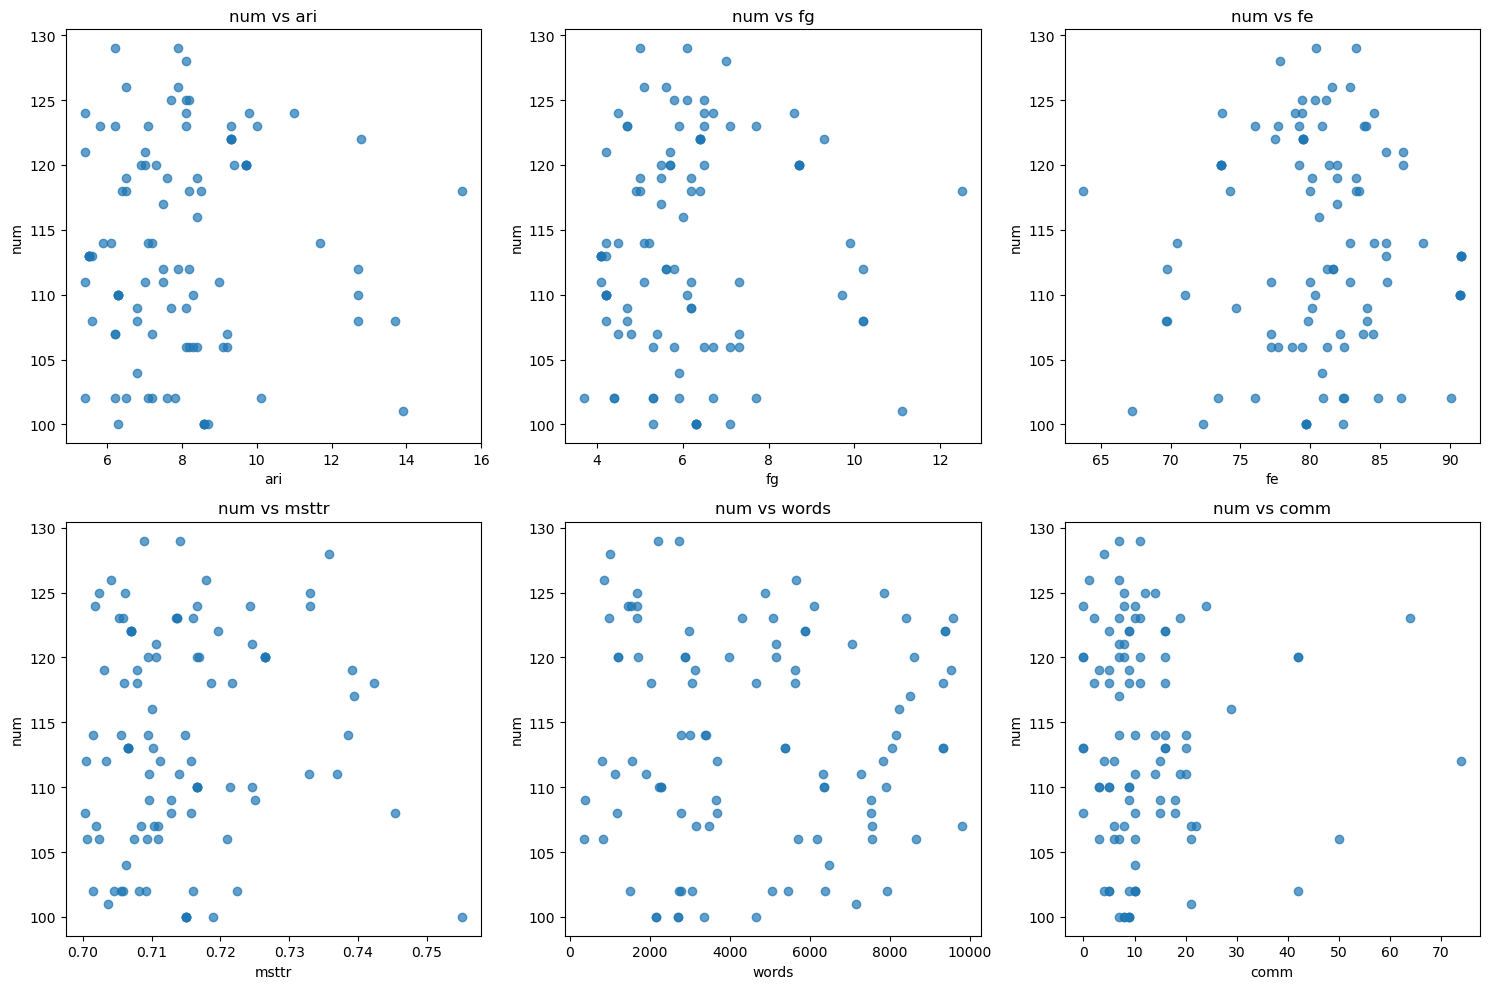

In [71]:
# Creat a figure with subplots (2 rows x 3columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot each independent variable against the dependent variable
# Loop through the independents list, extracting a variable var in each iteration along with its index i.
for i, var in enumerate(independent):
    # Select the i-th subplot. x = data[var] → all values of the variable (e.g., "ari", "fg"). 
    # y = data[dependent] → the target variable ("num," representing kudos)
    # Set transparency to prevent excessive overlap of data points
    axes[i].scatter(data[var], data[dependent], alpha=0.7)
    
    # Set the label for the x-axis, which represents the variable name
    axes[i].set_xlabel(var)
    
    # Set the label for the y-axis, naming it "num."
    axes[i].set_ylabel(dependent)
    
    # Format the subplot title as "num vs. variable"
    axes[i].set_title(f'{dependent} vs {var}')
    
plt.tight_layout()
plt.show()

In [45]:
#（3） Perform Simple Linear Regression for each independent variable
from sklearn.linear_model import LinearRegression

In [72]:
# Y = b0 + b1 * X

for var in independent:
    # Reshape X to a 2D array for scikit-learn
    X = data[[var]]            # shape: (n_samples, 1)
    y = data[dependent]        # shape: (n_samples,)

    # Create and fit the linear regression model instance from sklearn
    model = LinearRegression()
    model.fit(X, y)

    # Get model parameters
    intercept = model.intercept_  
    coefficient = model.coef_[0]
    r2_score = model.score(X, y)  # Coefficient of determination (R^2)

    # Print a summary
    print(f"num vs {var}")                          # Give a subtitle for the small summary of each part 
    print(f"  Intercept (b0):    {intercept:.3f}")  # Predicted num (kudos) if var == 0
    print(f"  Coefficient (b1): {coefficient:.3f}") # How much kudos changes per 1-unit increase in var
    print(f"  R^2:              {r2_score:.3f}\n")  # fraction of kudos variation explained by var
    
    

num vs ari
  Intercept (b0):    113.016
  Coefficient (b1): 0.085
  R^2:              0.000

num vs fg
  Intercept (b0):    112.193
  Coefficient (b1): 0.246
  R^2:              0.003

num vs fe
  Intercept (b0):    115.116
  Coefficient (b1): -0.018
  R^2:              0.000

num vs msttr
  Intercept (b0):    71.272
  Coefficient (b1): 59.365
  R^2:              0.007

num vs words
  Intercept (b0):    113.743
  Coefficient (b1): -0.000
  R^2:              0.000

num vs comm
  Intercept (b0):    113.860
  Coefficient (b1): -0.013
  R^2:              0.000



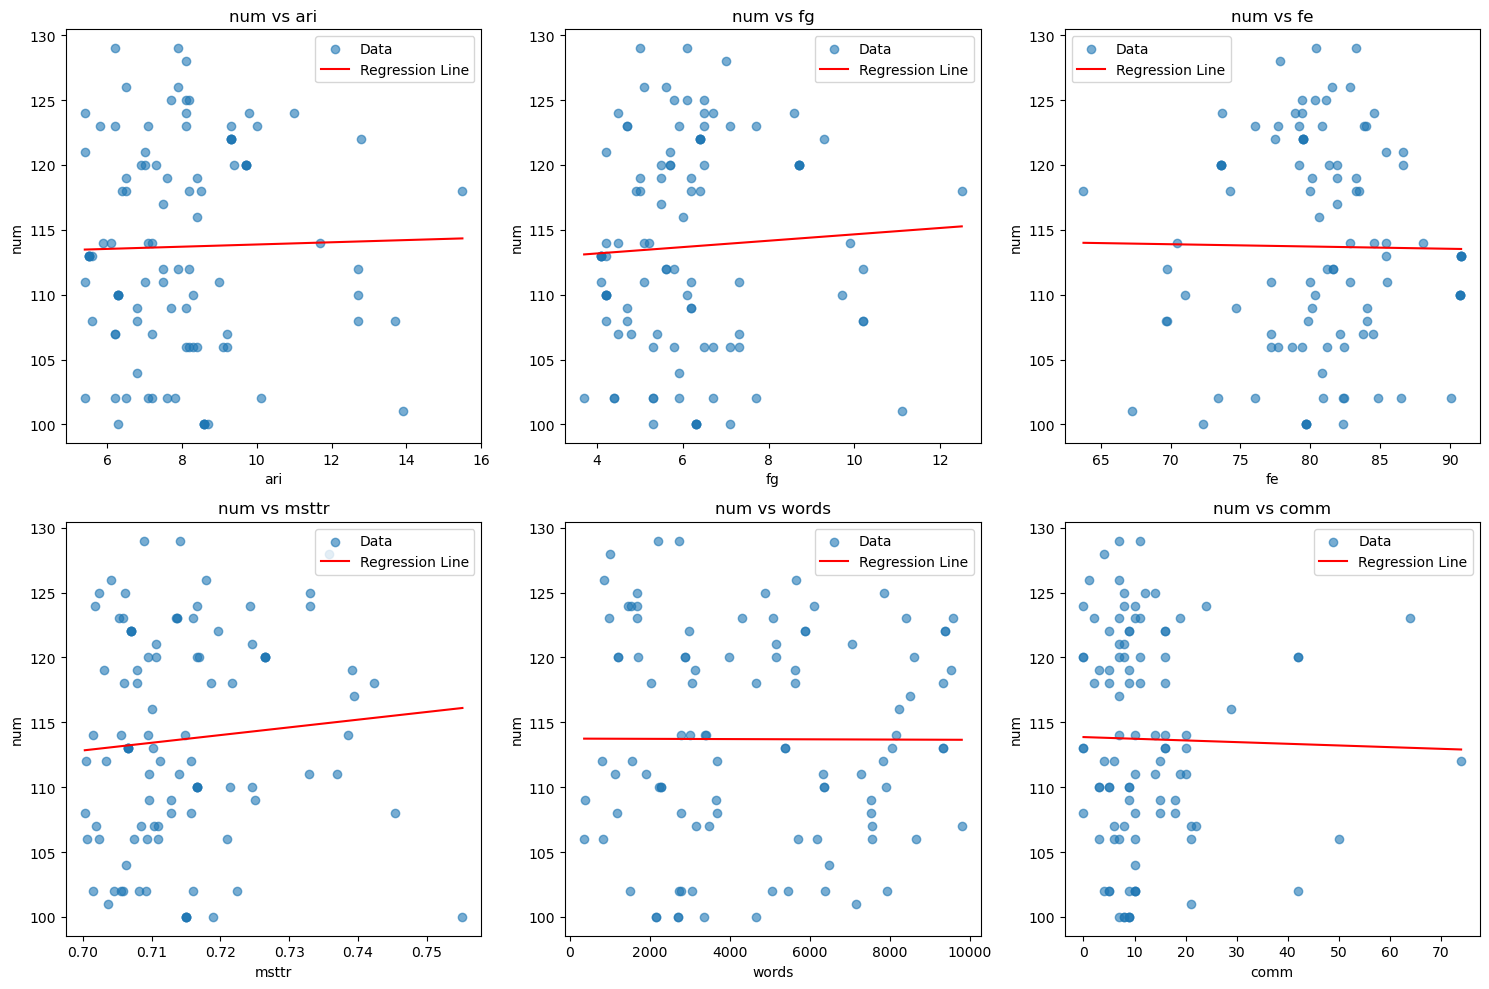

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10)) # create a single figure with 6 subplots.
axes = axes.flatten()  # Convert 2D array of axes into 1D array

for i, var in enumerate(independents):
    X = data[[var]]    
    y = data[dependent]
    
    # Create and fit the linear regression model instance from sklearn
    model = LinearRegression()
    model.fit(X, y)
    
    # Create x_range
    x_min, x_max = X[var].min(), X[var].max()   # Find the minimum and maximum values of the current variable (var)
    x_range = np.linspace(x_min, x_max, 100)    # Generate 100 evenly spaced points between x_min and x_max (NumPy)
    x_range_df = pd.DataFrame({var: x_range})   # Create a new DataFrame with the same column name as X 
    y_pred = model.predict(x_range_df)          # Use the fitted model to predict y-values (kudos) for each x in x_range.

    # Scatter plot on axes[i]
    axes[i].scatter(X, y, alpha=0.6, label='Data')                        # On subplot i, plot the raw data points for this variable (X, y)
    axes[i].plot(x_range, y_pred, color='red', label='Regression Line')   # On subplot i, plot the regression line in red, labeled 'Regression Line'

    # Labeling
    axes[i].set_xlabel(var)                       # Label the x-axis with the variable name
    axes[i].set_ylabel(dependent)                 # Label the y-axis with the dependent variable
    axes[i].set_title(f'{dependent} vs {var}')    # Title each subplot as "num vs words", "num vs ari", etc
    axes[i].legend()                              # Display the legend so that "Data" and "Regression Line" appear

# After the loop, apply tight_layout to the entire figure
fig.tight_layout() # Automatically adjust spacing around subplots so labels/titles don't overlap
plt.show()         # Display the entire figure with 6 subplots

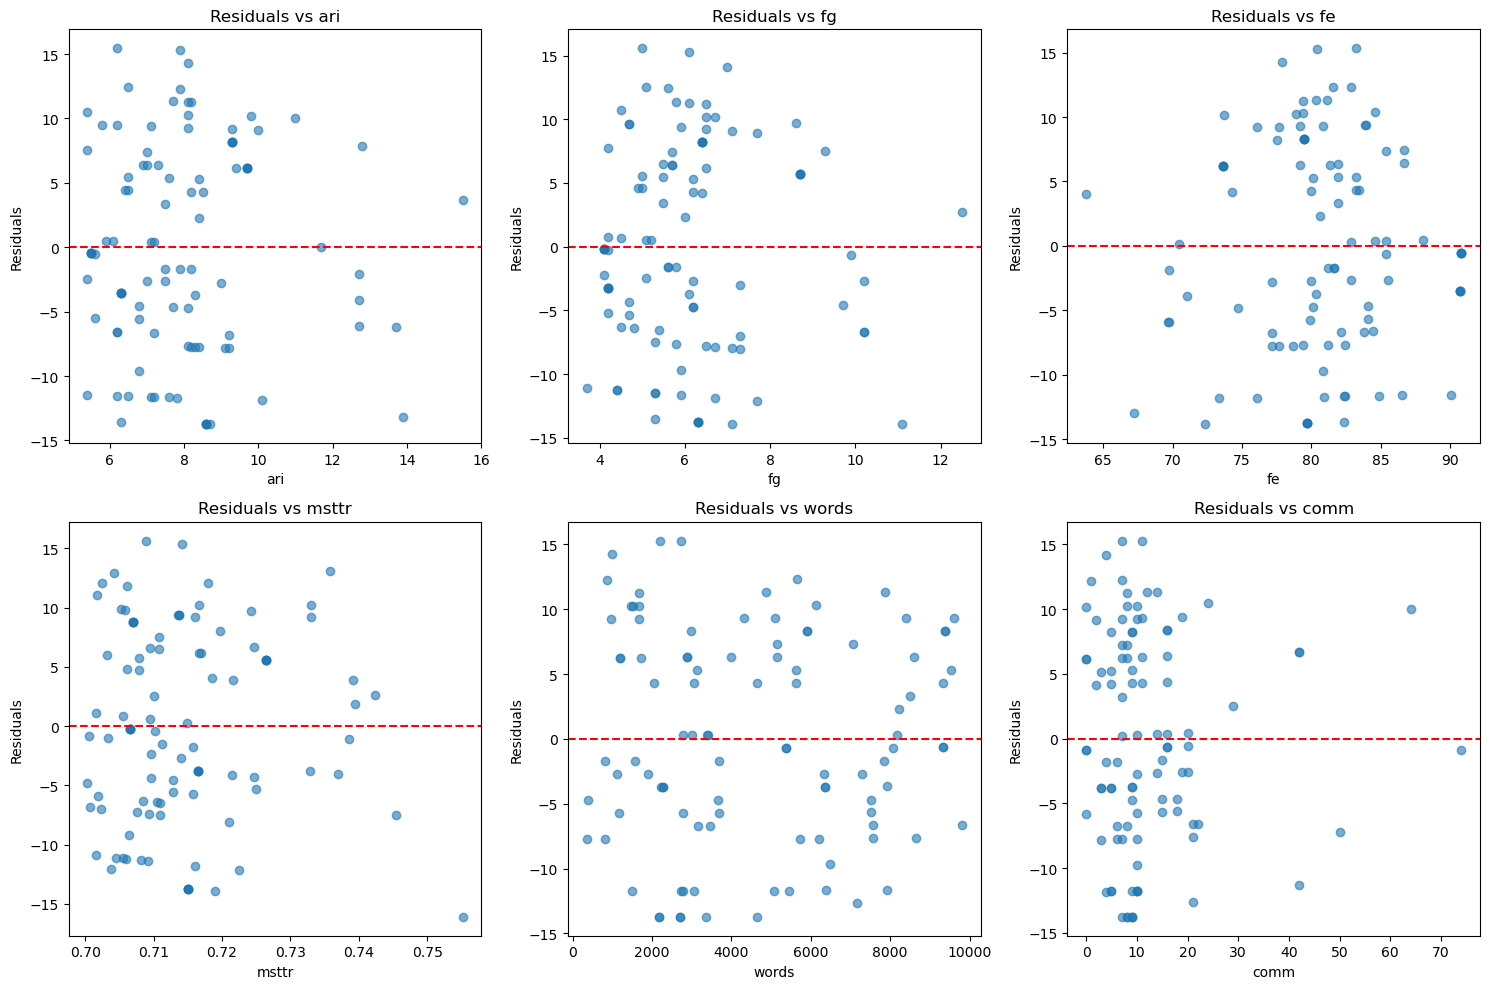

In [74]:
# Create a figure with 2 rows x 3 columns (6 subplots)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten() 

# Loop through each variable to fit a model and plot residuals
for i, var in enumerate(independents):
    X = data[[var]]  
    y = data[dependent]

    model = LinearRegression()
    model.fit(X, y)

    # Predict on the same data
    y_pred = model.predict(X) # y_pred are the predicted kudos values

    # Calculate residuals: (actual - predicted)
    residuals = y - y_pred   
 
    # Plot residuals vs. the independent variable
    axes[i].scatter(X[var], residuals, alpha=0.6)
    axes[i].axhline(y=0, color='red', linestyle='--')  # Reference line at 0

    # Labeling
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Residuals')
    axes[i].set_title(f"Residuals vs {var}")

# 5) Adjust layout and show all subplots
fig.tight_layout()
plt.show()


In [75]:
from scipy import stats

shapiro_test = stats.shapiro(residuals)
print(shapiro_test)


ShapiroResult(statistic=0.9547842144966125, pvalue=0.0017379280179738998)
